In [596]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd
from sklearn.cluster import KMeans
from math import sqrt
import  pylab as pl
import numpy as np
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/philippines-stock-exchange-dataset/stocks.csv


# Data Preprocesssing

In [597]:
df = pd.read_csv("../input/philippines-stock-exchange-dataset/stocks.csv")
df.head(10)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Stock Name,Code,Date,Price,Open,High,Low,Volume,Change%
0,Abra Mining and Industrial Corp,AR,"Mar 03, 2021",0.0046,0.0057,0.0071,0.0043,215.45B,-14.81%
1,Abra Mining and Industrial Corp,AR,"Mar 02, 2021",0.0054,0.0036,0.0054,0.0036,122.74B,50.00%
2,Abra Mining and Industrial Corp,AR,"Mar 01, 2021",0.0036,0.0035,0.0036,0.0033,5.89B,5.88%
3,Abra Mining and Industrial Corp,AR,"Feb 26, 2021",0.0034,0.0033,0.0036,0.0032,9.59B,0.00%
4,Abra Mining and Industrial Corp,AR,"Feb 24, 2021",0.0034,0.0038,0.0038,0.0032,29.68B,-12.82%
5,Abra Mining and Industrial Corp,AR,"Feb 23, 2021",0.0039,0.0039,0.0042,0.0036,20.39B,-2.50%
6,Abra Mining and Industrial Corp,AR,"Feb 22, 2021",0.004,0.0043,0.0043,0.0039,12.50B,-6.98%
7,Abra Mining and Industrial Corp,AR,"Feb 19, 2021",0.0043,0.0044,0.0045,0.0041,11.53B,-2.27%
8,Abra Mining and Industrial Corp,AR,"Feb 18, 2021",0.0044,0.0043,0.0045,0.0041,10.72B,2.33%
9,Abra Mining and Industrial Corp,AR,"Feb 17, 2021",0.0043,0.0046,0.0046,0.0043,10.89B,-8.51%


In [598]:
df = df.drop(['Stock Name', 'Date', 'Open', 'High', 'Low', 'Volume', 'Change%'], axis=1)
df['Price'] = df['Price'].replace(',','', regex=True)
df['Price'] = df['Price'].astype(str).astype(float)
df['Price'] = df['Price'].pct_change().fillna(method='pad')
df.head()

,Code,Price
0,AR,NaN
1,AR,0.173913
2,AR,-0.333333
3,AR,-0.055556
4,AR,0.000000


In [599]:
#sns.heatmap(df.isnull().transpose(), xticklabels = False, cbar=False, cmap = 'Blues')

In [600]:
df1 = df.groupby(['Code']).mean()
df1.columns = ["Returns"]
df1.head()

,Returns
Code,
2GO,-0.000230
8990P,0.051879
AAA,0.001973
AB,0.001816
ABA,-0.000046


In [601]:
df2 = df.groupby(['Code']).std()
df2.columns = ["Variance"]
df2.head()

,Variance
Code,
2GO,0.045560
8990P,1.277253
AAA,0.062325
AB,0.046465
ABA,0.036658


In [602]:
df = pd.concat([df1, df2], axis = 1).dropna()
df.columns = ["Returns","Variance"]
df.head()

,Returns,Variance
Code,,
2GO,-0.000230,0.045560
8990P,0.051879,1.277253
AAA,0.001973,0.062325
AB,0.001816,0.046465
ABA,-0.000046,0.036658


# K-Means Clustering

**Decision Point**: Number of Clusters

**Action**: Use the elbow method to calculate the SSE(Sum Squared error). Then, plot number of clusters and the SSE.

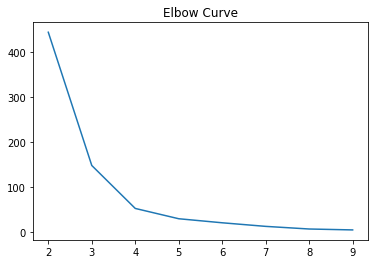

In [603]:
X = df.values
sse = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_) #SSE for each n_clusters
    
pl.plot(range(2,10), sse)
pl.title("Elbow Curve")
pl.show()

n_clusters = 4

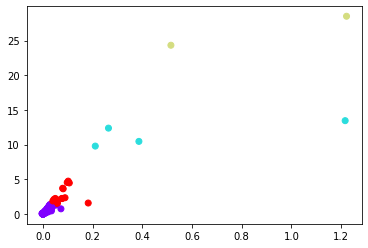

In [604]:
kmeans = KMeans(n_clusters = 4).fit(X)
centroids = kmeans.cluster_centers_
pl.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
pl.show()

# Removing outliers (3 values)

In [605]:
print(df1.idxmax())
print(df2.idxmax())
print(df.idxmax())

Returns    PRF2A
dtype: object
Variance    PRF2A
dtype: object
Returns     PRF2A
Variance    PRF2A
dtype: object


In [606]:
df.drop("PRF2A", inplace =True)
df1.drop("PRF2A", inplace =True)

In [607]:
print(df1.idxmax())
print(df.idxmax())

Returns    BH
dtype: object
Returns      BH
Variance    UBP
dtype: object


In [608]:
df.drop("BH", inplace =True)
df1.drop("BH", inplace =True)
df.drop("UBP", inplace =True)
df1.drop("UBP", inplace =True)

In [609]:
print(df1.idxmax())
print(df.idxmax())

Returns    GTPPB
dtype: object
Returns     GTPPB
Variance      ALI
dtype: object


In [610]:
df.drop("GTPPB", inplace =True)
df1.drop("GTPPB", inplace =True)
df.drop("ALI", inplace =True)
df1.drop("ALI", inplace =True)

In [611]:
print(df1.idxmax())
print(df.idxmax())

Returns    SM
dtype: object
Returns     SM
Variance    SM
dtype: object


In [612]:
df.drop("SM", inplace =True)
df1.drop("SM", inplace =True)

In [613]:
print(df1.idxmax())
print(df.idxmax())

Returns    ALCPC
dtype: object
Returns     ALCPC
Variance      JFC
dtype: object


In [614]:
df.drop("ALCPC", inplace =True)
df1.drop("ALCPC", inplace =True)
df.drop("JFC", inplace =True)
df1.drop("JFC", inplace =True)

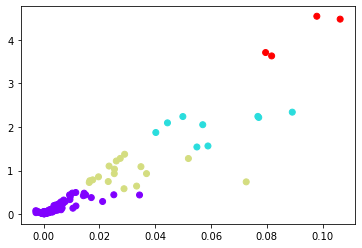

In [615]:
X = df.values
kmeans =KMeans(n_clusters = 4).fit(X)
centroids = kmeans.cluster_centers_
pl.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
pl.show()

In [616]:
pd.set_option('display.max_rows', None)
df = pd.DataFrame(df.index)
labels = pd.DataFrame(kmeans.labels_)
df = pd.concat([df, labels],axis = 1)

In [617]:
df.columns = ['Stock Code', 'Category']

In [618]:
print(df)

    Stock Code  Category
0          2GO         0
1        8990P         2
2          AAA         0
3           AB         0
4          ABA         0
5          ABG         0
6          ABS         0
7         ABSP         0
8           AC         0
9          ACE         0
10        ACEN         1
11        ACEX         0
12       ACPB1         0
13       ACPB2         1
14         ACR         0
15         AEV         0
16         AGI         0
17        ALCO         0
18       ALCPB         0
19        ALHI         0
20       ALLHC         0
21         ANI         0
22         ANS         0
23          AP         0
24         APC         0
25         APL         1
26         APO         0
27         APX         0
28         ARA         0
29       AREIT         0
30          AT         0
31         ATI         0
32         ATN         0
33        ATNB         0
34         AUB         0
35        AXLM         0
36          BC         0
37         BCB         0
38        BCOR         0


In [626]:
df.query('Category == 0').sample(n=3)

,Stock Code,Category
224,PRF3B,0
6,ABS,0
225,PRIM,0


In [627]:
df.query('Category == 1').sample(n=3)


,Stock Code,Category
222,PRF2B,1
207,PHA,1
25,APL,1


In [628]:
df.query('Category == 2').sample(n=3)

,Stock Code,Category
189,MWP,2
119,GLOPP,2
223,PRF3A,2


In [629]:
df.query('Category == 3').sample(n=3)

,Stock Code,Category
118,GLO,3
109,FMETF,3
275,TEL,3


# Quick Observations

**Cluster 0** - Low cap stocks

**Cluster 1** - Low to mid cap but liquid

**Cluster 2** - More preferred stocks

**Cluster 3** - High cap, blue-chip level